In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('food_test.csv')

In [4]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [9]:
test.count()

id                       32573
week                     32573
center_id                32573
meal_id                  32573
checkout_price           32573
base_price               32573
emailer_for_promotion    32573
homepage_featured        32573
dtype: int64

In [5]:
ful_info=pd.read_csv('fulfilment_center_info.csv')
meal_info=pd.read_csv('meal_info.csv')

In [6]:
train_with_ctrs=pd.merge(train,ful_info,on='center_id')
test_with_ctrs=pd.merge(test,ful_info,on='center_id')
test_with_ctrs.count()

id                       32573
week                     32573
center_id                32573
meal_id                  32573
checkout_price           32573
base_price               32573
emailer_for_promotion    32573
homepage_featured        32573
city_code                32573
region_code              32573
center_type              32573
op_area                  32573
dtype: int64

In [8]:
train_with_ctrs.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [9]:
train_final=pd.merge(train_with_ctrs,meal_info,on='meal_id')
test_final=pd.merge(test_with_ctrs,meal_info,on='meal_id')

In [12]:
train_final.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [10]:
columns_to_drop=['center_id','meal_id']
train_final.drop(labels=columns_to_drop,axis=1,inplace=True)
test_final.drop(labels=columns_to_drop,axis=1,inplace=True)
train_final.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [12]:
train_final_dummies=pd.get_dummies(train_final)
test_final_dummies=pd.get_dummies(test_final)
test_final_dummies.T.head(31)

,0,1,2,3,4,5,6,7,8,9,...,32563,32564,32565,32566,32567,32568,32569,32570,32571,32572
id,1028232.00,1262649.00,1453211.00,1262599.00,1495848.00,1342607.00,1358429.00,1475006.00,1009709.00,1460444.00,...,1460911.00,1436368.00,1006634.00,1226340.00,1402413.00,1412025.00,1287019.00,1396176.00,1331977.00,1017414.00
week,146.00,147.00,149.00,150.00,151.00,152.00,153.00,154.00,155.00,146.00,...,150.00,151.00,152.00,153.00,155.00,146.00,147.00,149.00,150.00,152.00
checkout_price,158.11,159.11,157.14,159.14,160.11,159.11,159.11,160.11,158.11,158.11,...,581.03,582.03,581.03,581.03,680.03,583.03,582.03,629.53,629.53,630.53
base_price,159.11,159.11,158.14,157.14,159.11,160.11,158.11,158.11,159.11,160.11,...,582.03,582.03,581.03,581.03,678.03,581.03,582.03,629.53,629.53,631.53
emailer_for_promotion,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
homepage_featured,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
city_code,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,614.00,...,638.00,638.00,638.00,638.00,638.00,473.00,473.00,473.00,473.00,473.00
region_code,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,85.00,...,56.00,56.00,56.00,56.00,56.00,77.00,77.00,77.00,77.00,77.00
op_area,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.60,...,7.00,7.00,7.00,7.00,7.00,4.50,4.50,4.50,4.50,4.50
center_type_TYPE_A,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [13]:
Y=train_final_dummies['num_orders']
X=train_final_dummies.drop(['num_orders'],axis=1)
X_test=test_final_dummies
display(X.head())
X_test.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_A,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,136.83,152.29,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1018704,2,135.83,152.29,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
2,1196273,3,132.92,133.92,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1116527,4,135.86,134.86,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1343872,5,146.50,147.50,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1


,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_A,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1028232,146,158.11,159.11,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1262649,147,159.11,159.11,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
2,1453211,149,157.14,158.14,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1262599,150,159.14,157.14,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1495848,151,160.11,159.11,0,0,647,56,2.0,0,...,0,0,0,0,0,0,0,0,0,1


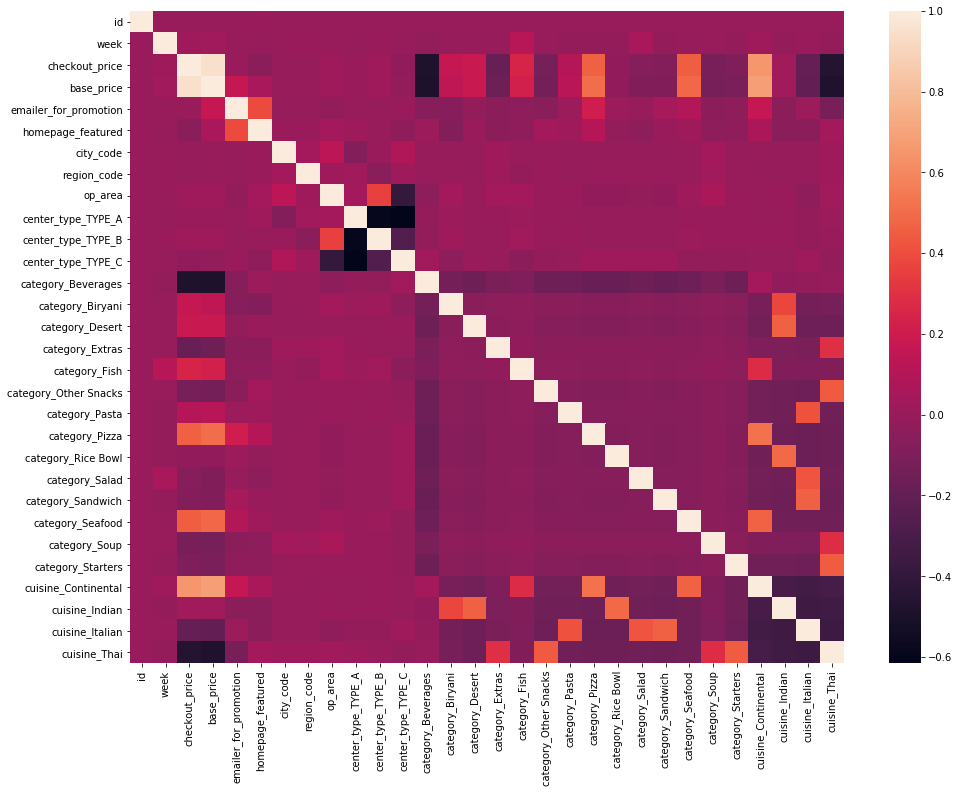

In [19]:
plt.figure(figsize=(16, 12))

sns.heatmap(X.corr())

In [28]:
Pred_id=X_test.id
columns_to_drop=['base_price','id']
X.drop(['id'],axis=1,inplace=True)
X_test.drop(['id'],axis=1,inplace=True)

In [30]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,n_estimators=200,oob_score=True)

In [31]:
model.fit(X.values,np.array(Y))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
y_preds=model.predict(X_test.values)
np.sum(y_preds<0)

0

In [33]:
submission=pd.read_csv("sample_submission_hSlSoT6.csv")
submission.head()
submission['id']=Pred_id
submission['num_orders']=y_preds
pd.DataFrame(submission, columns=['id','num_orders']).to_csv('RandomForests.csv',index=False)

In [14]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [15]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,n_estimators=200,oob_score=True)

In [16]:
model.fit(X_train1.values,np.array(Y_train1))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_preds1=model.predict(X_test1.values)
np.sum(y_preds<0)